# Kaggle房价预测 (特征工程篇)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../data/house_prediction/train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
df_train['SalePrice'].describe

<bound method NDFrame.describe of 0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64>

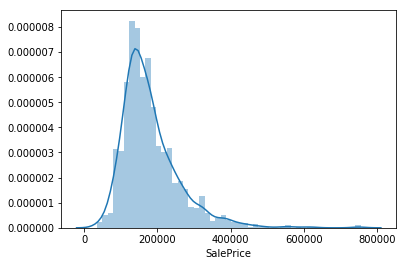

In [7]:
sns.distplot(df_train['SalePrice'])

### 偏度(skewness)

偏度（skewness），是统计数据分布偏斜方向和程度的度量，**是统计数据分布非对称程度的数字特征**。偏度(Skewness)亦称偏态、偏态系数。

**表征概率分布密度曲线相对于平均值不对称程度的特征数**。直观看来就是密度函数曲线尾部的相对长度。 

定义上偏度是样本的三阶标准化矩(中心矩)： 

$skew(X)=E[(\frac{X-\mu}{\sigma})^3]\tag{$1$}$

In [8]:
df_train['SalePrice'].skew()

1.8828757597682129

### 峰度(Kurtosis)

峰度，峰度衡量数据分布的平坦度（flatness）。尾部大的数据分布，其峰度值较大。正态分布的峰度值为3。

In [9]:
df_train['SalePrice'].kurt()

6.5362818600645287

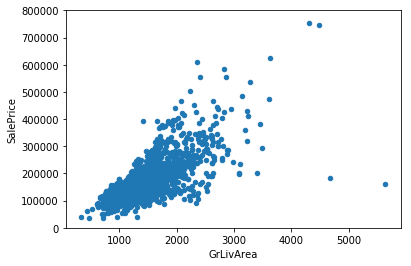

In [10]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x = var, y = 'SalePrice', ylim=(0, 800000))

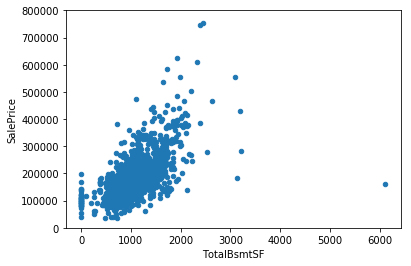

In [11]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

(-0.5, 9.5, 0, 800000)

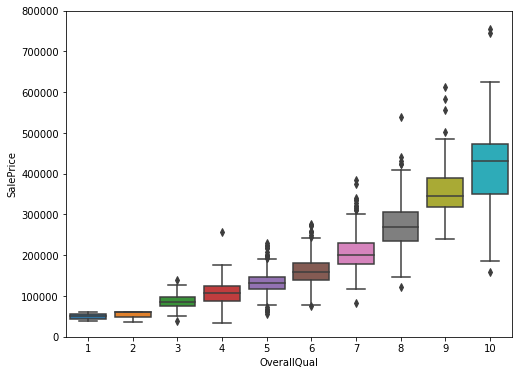

In [12]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = var, y = 'SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

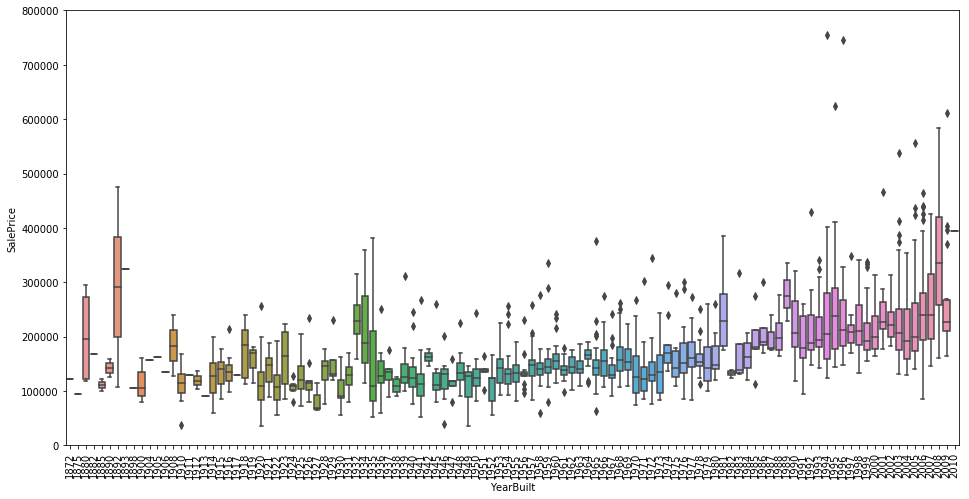

In [13]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

### <font color="red">**相关矩阵correlation matrix是最重要的一种图，它最能反映所有特征之间的相关关系**
    
**通过Seaborn的heatmap我们可以轻易的画出来**

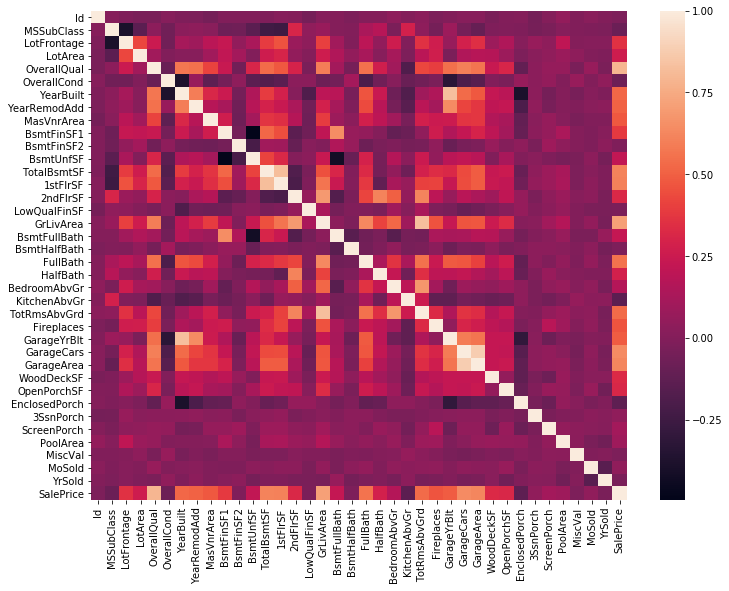

In [14]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)

** 下面我们选出与'SalePrice'相关系数最高的10个量再次画出他们的Heatmap，这种思想一定要掌握。**

这里我们需要用到``numpy``的求协方差与相关系数，这里我们需要补充一下这些知识。

[协方差与相关系数 numpy中cov与corrcoef的使用](http://blog.csdn.net/iloveyousunna/article/details/77948219)

### 协方差

总的来说，协方差衡量两个变量间的变化趋势是否一致，可以简单理解为变化是否同向或反向，正值代表变化为同向，负值代表变化为反向，协方差的数值越大，两个变量同向程度也就越大。反之亦然。

### 相关系数(corrcoef)

可以理解为标准化后的协方差，是用以反映变量之间相关关系密切程度的统计指标，它通过除以标准差消除了两个变量变化幅度的影响，而只是单纯反应两个变量每单位变化时的相似程度。

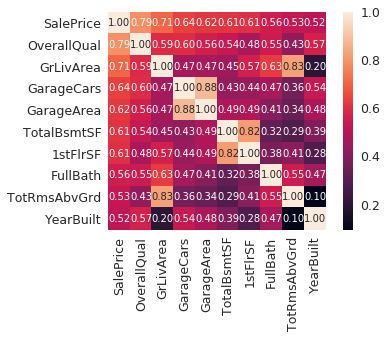

In [15]:
k = 10
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
    annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

上图是与我们最终要确定的目标SalePrice最相关的10个量，但是如果我们进一步观察，其实我们接下来的分析并不需要这么多的特征，因为有些特征度量的是相同的值，比如我们的GarageCars以及GarageArea，因此我们可以从这十个特征中再剔除一些特征，最后选择了7个特征。

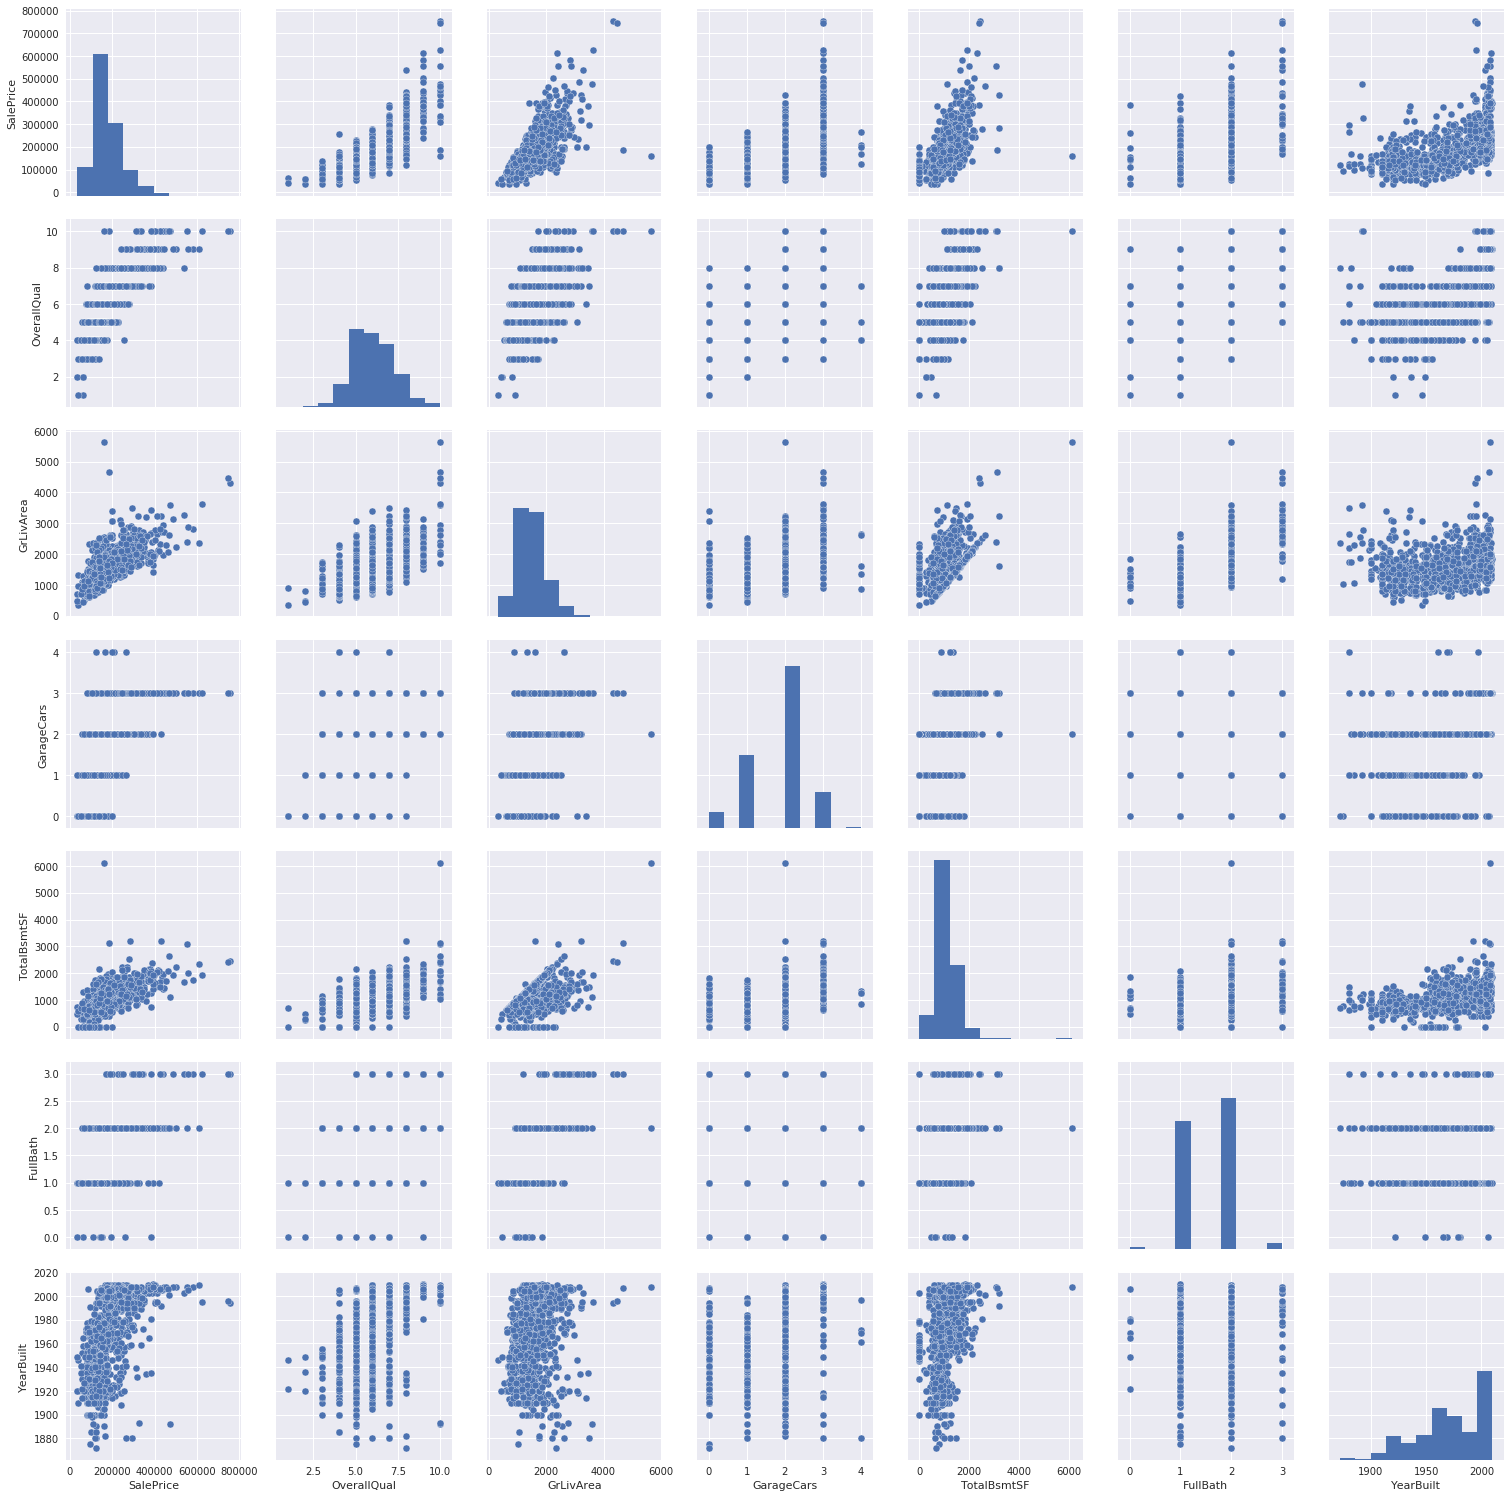

In [16]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 3)
plt.show();

## 缺失值的处理 (Missing data)

首先我们应该考虑的是当超过$15\%$的数据丢失时，我们应该删除相应的变量并假装它从来不存在。

对于剩下的缺失数据，我们应该考虑是不是某些缺失数据之间的具有较高的相似性，对于这类数据，比如下面的``GarageXXX``,他们之间的缺失值的比例都是相同的，而上面的热力图中``GarageCars``又与``SalePrice``有那么高的相关性，因此我们应该将缺失数据中的``GarageXXX``这一列全部删除，``BsmtXXX``也有相似的特点，

对于最后剩下的少部分的含有缺失值的行，我们就单独删除这一行数据(记住不是这一列),比如对于此问题中的``Electrical``。

最后不太确定能不能删除的就可以采用一些``fillna``的手段来将其填充进去了。

In [17]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (total / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.sort_values(by="Total", ascending=False)

In [18]:
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479


In [19]:
df_train = df_train.drop(missing_data[missing_data['Total'] > 1].index, 1)

In [29]:
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [30]:
df_train.shape

(1459, 63)

In [32]:
df_train.isnull().sum().max()

0

以上就是我们对于缺失数据的处理方法

## 异常值的处理(Outliers)

## (TODO@ANG) 2018年1月29日14:19